# Airbus Ship Detection dataset exploration

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

root_dir = "/media/davidtvs/Storage/Datasets/airbus-ship-detection"
trainset_dir = os.path.join(root_dir, "train_v2")
testset_dir = os.path.join(root_dir, "test_v2")
train_rle = os.path.join(root_dir, "train_ship_segmentations_v2.csv")

## Dataset size

In [2]:
print("Number of images in train folder:", len(os.listdir(trainset_dir)))
print("Number of images in test folder:", len(os.listdir(testset_dir)))

Number of images in train folder: 192556
Number of images in test folder: 15606


## Ships distribution in training set

In [3]:
# Run length encoding CSV
rle_df = pd.read_csv(train_rle)
rle_df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [4]:
# Images with n ships have n rows
unique_rle_df = rle_df.drop_duplicates('ImageId')
num_images = len(unique_rle_df)
print("Number of images in run length encoding CSV:", num_images)

Number of images in run length encoding CSV: 192556


In [5]:
# Images without ships have EncodedPixels set to NaN
images_with_ships = unique_rle_df.dropna(subset=['EncodedPixels'])
num_images_with_ships = len(images_with_ships)
num_images_wo_ships = len(unique_rle_df) - len(images_with_ships)
print("Number of images with ships: {0} ({1:.2f})".format(num_images_with_ships, (num_images_with_ships / num_images) * 100))
print("Number of images without ships: {0} ({1:.2f})".format(num_images_wo_ships, (num_images_wo_ships / num_images) * 100))

Number of images with ships: 42556 (22.10)
Number of images without ships: 150000 (77.90)


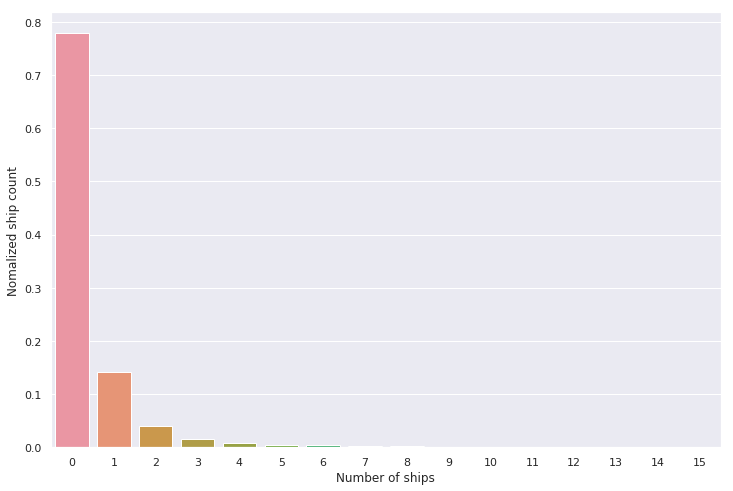

In [6]:
ship_count_df = rle_df.groupby('ImageId').count().reset_index().rename(columns={"EncodedPixels": "ShipCount"})
ship_dist = ship_count_df.groupby('ShipCount')['ShipCount'].agg('count')
ship_dist = ship_dist / sum(ship_dist)
fig = plt.figure(figsize=(12, 8))
g = sns.barplot(x=ship_dist.index, y=ship_dist.values)
_ = g.set_ylabel("Nomalized ship count")
_ = g.set_xlabel("Number of ships")